# Denis Gauthier

## Research question/interests
Has the cultural shift towards the importance of school affected increased the Dogwood Diploma completion rate inside British Columbia's schools?

With the cultural mindset shifting towards post-secondary education as necessary, has this been reflected in dogwood completion rates inside British Columbia? As well as has the betterment of cultural mindset towards disabilities and the support given to students that are classified as having disabilities increased the overall completion rate for those affected


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Step 1 - Load the data
data = pd.read_csv("../data/processed/Completion_Rates_clean.csv")
data

,Unnamed: 0,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49821,55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100.000
49822,55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
49823,55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100.000
49824,55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.970,100.000


In [45]:
#Function for stripping if needed/cleaning
def dataStripping (dataFrame, column, value, boolean=True):
    """
    Removes the directed item & returns the newly cleaned df
    Input:
        - dataFrame = the pandas dataframe you need cleaned
        - column = The pandas df column key
        - value = The value you want removed
        - boolean = True = you want this item only, False = remove it 
    Output: 
        - The newly cleaned pandas Dataframe
    """
    #try:
    cleanData = dataFrame[dataFrame['{}'.format(column)].str.contains('{}'.format(value)) == boolean]
    return cleanData
    #except:
       # print("Error! Something is wrong in dataStripping")

In [4]:
# Step 2 Removes all the Msk from the dataset - Drops roughly 4770 rows of data 
#cleanData = data[data[ 'SUCCESS_COUNT' ].str.contains( 'Msk' )==False ]

#This is saving the cleaned data as a csv file in the processed file so future analysis can be just done from the new file 
#cleanData.to_csv('../data/processed/Completion_Rates_Clean.csv')


In [39]:
#Step 2: Cleaning the data - cell for cleaning & getting variables

#This chunk of code slowly selects just provincal total data, So just the overall totals per year

#Grabbing only ALL students - so they are not broken down by other types
provinicalData = data[data['SUB_POPULATION'].str.contains('ALL STUDENTS') == True]
#Only getting Province-total 
provdata = provinicalData[provinicalData['PUBLIC_OR_INDEPENDENT'].str.contains('PROVINCE-TOTAL') == True]
#This is normal dogwood completion rate & not extended models 
totalprovdata = provdata[provdata['COMPLETION_RATE_MODEL'].str.contains('SIX YEAR DOGWOOD COMPLETION RATE')]
#Only the completion rate
estCompRate = totalprovdata['ESTIMATED_COMPLETION_RATE']
#Only the unqiue years so 1999/2000-2020/2021 school years
year = totalprovdata['YEAR_6_OF_COHORT'].unique()




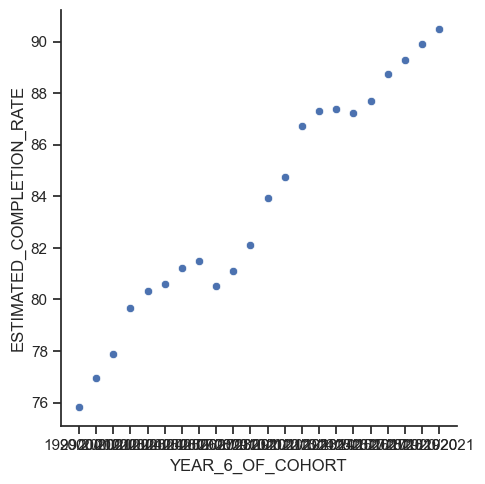

In [32]:
#Plot for EDA(?)
sns.set_theme(style='ticks', font_scale =1)
plt.rc("axes.spines", top=False, right=False)
sns.relplot(x='YEAR_6_OF_COHORT', y ='ESTIMATED_COMPLETION_RATE', data=totalprovdata)


In [47]:
indig = dataStripping(data,'SUB_POPULATION','INDIGENOUS',True)
indig

,Unnamed: 0,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
1,1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
6,6,1997/1998,PROVINCE LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3636,1256,439.636,39.295
7,7,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,43841,30488,4453.165,77.405
9,11,1997/1998,PROVINCE LEVEL,INDIGENOUS,BC INDEPENDENT SCHOOL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,89,28,11.882,36.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49815,55583,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,91.0,Nechako Lakes,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,134,62,11.112,50.452
49816,55584,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,91.0,Nechako Lakes,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,244,168,21.293,75.436
49820,55588,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,92.0,Nisga'a,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,29,16,1.142,57.434
49822,55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
